Hello World,

My name is Alex LordThorsen and I'm going to be talking about Flask and (if we have time) a couple of Flask Plugins.

#Topics:
* Why Flask?
* A Simple Example
* The app Object
* Routes Using The App
* What Do Routes Return?
* What are these template things?
* Returning JSON
* The Development Server
* The Debug Stack Traces and Consoles
* More on the request object
* The g and session Object
* Configuration
* All Flask Objects


#Why Flask?
Flask is very simple and clean. It amazing easy to create a working application which serves real data (the heart_beat example is production code with 588 lines of code of which 231 is tests and 51 are project configuration that I wrote in 6 hours). Flask also lets you just start writing code without having to deal with any boiler plate (beyond two lines).

[The flaskr example page](https://github.com/mitsuhiko/flask/blob/master/examples/flaskr/flaskr.py) is a fully functional blog (logins, logouts, page addition, homepage) in 110 lines of code backed by a sqlite3 database.

Flask is also just an [amazing code base](https://github.com/mitsuhiko/flask). There has been more then one occuasion where I've looked at the source code to answer a question and it's always a pleasant experience.

The Flask community is also very active and rabid. [The extensions library is filled with Gem's](http://flask.pocoo.org/extensions/) like [Flask-Cache](https://pythonhosted.org/Flask-Cache/), [Flask-DebugToolbar](http://flask.pocoo.org/extensions/), [Flask-lesscss](https://pypi.python.org/pypi/flask-lesscss), [Flask-login](https://pypi.python.org/pypi/Flask-Login), [Flask-WTF](https://pypi.python.org/pypi/Flask-WTF)and [Flask-SQlAlchemy](https://pypi.python.org/pypi/Flask-SQLAlchemy).

If no one has made a Flask Extension that suits your needs then [creating an extension](http://flask.pocoo.org/docs/0.10/extensiondev/) requires about an hour worth of reading, a `setup.py` file, and  a class that modifies a flask app object.

Lastly, I believe my strongest argument for why Flask is a great web framework is myself. I am not a web programmer but Flask is built in a well organized modular fashion. Flask organizes the complexity of web development to the point where I have been able to tackle things in bite sized chunks. 


#So How Do I Use Flask?

In [1]:
from flask import Flask
app = Flask("the_flask_module")
# The app object is really the heart of flask. All extensions modify the app object and almost
# all of the flask magic comes from calling methods in the app object.

# If you've never seen decorators (the @app syntax) before then go read this later:
# http://thecodeship.com/patterns/guide-to-python-function-decorators/

@app.route("/") # This is some decorator magic. Please ask if you need it explained.
def home_page():
    return "I'm a home page"

# app.run is a blocking call that won't exit unless there's a user interrupt or a system error. 
# You'll have to controll-c to kill this cell to move on to the next cells.
app.run(host="0.0.0.0", port=5000)
# You now have a running web server. go to http://localhost:5000/ in a web browser or curl http://localhost:5000

#What Development Tools are there?
For some very down the rabbit hole reasons Flask can't do an `app.run()` with the debug flag set to true. As such this Notebook can't show you one of the best features of flask. 

So we're going to take a little detour.

There's two Flask Features which can only be displayed when you're running the app in debug mode.

For those working at home you'll need to navigate to 

    cd the_flask_module
    python reload_example.py

## [Flask Reloader Example](http://localhost:5002/)
For those working at home you'll need to navigate to 

    cd the_flask_module
    python debug_example.py

##[Flask Debugger Example](http://localhost:5001/missing_endif/)


[Root page example](http://localhost:5000/)

# Well, That's Cute. Where's Everything Else?
What you see in this example is about 50% of everything there is to Flask. There's some things about sessions, configuration, templating, url routing, http headers, http requests, cookies, and message flashing but this is the majority of everything. To be fair the `@app.route()` call is doing thousands of Python WSGI magic and the `app.run()` call is spinning up a entire http server with a WSGI module soooo...


## By Default There is No Support For
* Databases
* Forms
* An Admin page
* Page indexing
* Asynchronous calls
* Login Support
* Lots of other defaults in other frameworks.

This is by design.

"The idea of Flask is to build a good foundation for all applications. Everything else is up to you or extensions." -- Armin Ronacher, Author of Flask 

[All of those extra things are found in Flask Extensions which we'll cover in a the flask_extensions_notebook](http://flask.pocoo.org/extensions/)

# So what is a route?
In Flask a route is a function that has a `@app.route()` decorator above it. These define what url's route to what functions and what variables are passed to those functions.


## The @ keyword
[If you've never run into decorators before here's some (slightly verbose) explanations.](http://thecodeship.com/patterns/guide-to-python-function-decorators/) 
##`app.route()`
If you've ever done any functional programming before Flask uses the `@app.route()` method as a way to sneak pattern matching into function. [If you don't know what that means here's a little rabbit hole to go down at your own leasure](http://learnyouahaskell.com/syntax-in-functions) but we're going to basically show what this does by example.
## What are you returning too?
All routes are expected to return a string. These strings will be add to a [Flask Response object](http://flask.pocoo.org/docs/0.10/api/#flask.Response). This object contains the body and headers of the http response.


##TODO add http request life cycle (focus on URI and methods)
[If you're super duper interested in the full view of a request and response HTTP life cycle you can checkout this repository by Alex Gayner](https://github.com/alex/what-happens-when)

Here's a super simplified version.

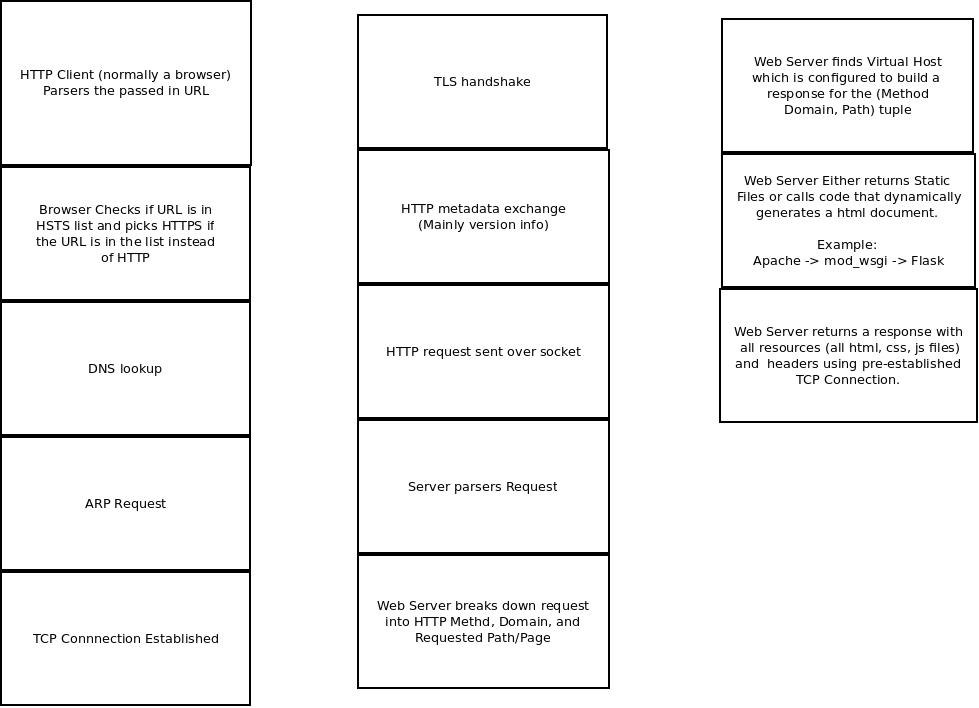

In [18]:
from IPython.display import Image 
Image(filename='request_and_response.jpeg') # This is extra information if you're interested.
# This is suuuper simplified and doesn't contain any error handling (which is where http gets hairy).

In [ ]:
from IPython.display import Image
Image(filename='flask_state_machine.jpg')# This is extra information if you're interested.

In [14]:
from flask import Flask
app = Flask("the_flask_module")

# Let's look at some of the things that you can do with routes.
@app.route("/hello")
def hello_page():
    return "I'm a hello page"

# You can go up to the HTML URL lenght limit of 2000 characters
# http://stackoverflow.com/questions/417142/what-is-the-maximum-length-of-a-url-in-different-browsers
@app.route("/hello/one_step_deeper")
def hello_deeper():
    return "I'm a hello page"

# the_last_slash_is_optional
@app.route("/hello/optional_slash/")
def optional_extra_slash():
    return "I can have a slash"

# Can't have slash
@app.route("/hello/no_slash")
def no_extra_slash():
    return "No slash for you."

# variables
@app.route('/<text_to_echo>/')
def echo(text_to_echo):
    return "echo {}".format(text_to_echo)

# variables but only ints
@app.route('/test/<int:int_to_echo>/')
def echo_only_ints(int_to_echo):
    return "echo {}".format(int_to_echo)

# two variables but only ints
@app.route('/add/<int:int_left>/<int:int_right>')
def add_ints(int_left, int_right):
    return "{}".format(int_left + int_right)

# the request object is where we can get http header information
# curl -X POST -d "{}" localhost:5000 # RUN THIS!
from flask import request
@app.route('/', methods=["GET", "POST", "PUT"])
def get_or_post():
    return request.method

@app.route('/all_methods', methods=["GET", "HEAD", "POST", "PUT", "DELETE", "CONNECT", "OPTIONS", "TRACE"])
def all_methods():
    return request.method


app.run(host="0.0.0.0", port=5000)
# You now have a running web server. go to http://localhost:5000/ in a web browser or curl http://localhost:5000

#TODO add example URL's to click rather then type

# TODO Talk about the route order of precedent
## Typed wild cards first
## General wild cards second
## strings last

# Having a two (or more) routes with the same function name name will cause an AssertionError exception.

In [13]:
from flask import Flask
app = Flask("the_flask_module")


@app.route("/hello")
def hello_page():
    return "I'm a hello page"

@app.route("/different_route")
def hello_page():
    return "Different route"


app.run(host="0.0.0.0", port=5000)
# You now have a running web server. go to http://localhost:5000/ in a web browser or curl http://localhost:5000

AssertionError: View function mapping is overwriting an existing endpoint function: hello_page

In [ ]:
from flask import Flask
app = Flask("the_flask_module")


@app.route('/div/<int:int_left>/<int:int_right>')
def div_ints(int_left, int_right):
    return "{}".format(int_left / int_right)


app.run(host="0.0.0.0", port=5000)
# You now have a running web server. go to http://localhost:5000/ in a web browser or curl http://localhost:5000

# Having a two (or more) routes with the same URL path will succeed but the second route will be unreachable.

In [42]:
from flask import Flask
app = Flask("the_flask_module")

# Having a two (or more) routes with the same name will cause an error.
@app.route("/hello")
def hello_page():
    return "I'm a hello page"

@app.route("/hello")
def second_hello_page():
    return "Different route"


app.run(host="0.0.0.0", port=5000)
# You now have a running web server. go to http://localhost:5000/ in a web browser or curl http://localhost:5000

#Flask Has a Top Down Order of Precedence
If you have multiple routes that could be potential matches for a request then the top most route (closest to line 0) will be the route which is mapped to.

In [44]:
from flask import Flask
app = Flask("the_flask_module")

# variables
@app.route('/<text_to_echo>/')
def echo(text_to_echo):
    return "echo {}".format(text_to_echo)

# variables
@app.route('/<text_to_echo>/')
def echo_two(text_to_echo):
    return "Totally going to do my own thing."


app.run(host="0.0.0.0", port=5000)
# You now have a running web server. go to http://localhost:5000/ in a web browser or curl http://localhost:5000

#What do Routes Return?

In [55]:
import os
from flask import Flask
# This is some path magic that's required because this is an IPython notebook.
template_dir = os.path.join(os.getcwd(), "the_flask_module", "templates")
app = Flask("the_flask_module", template_folder=template_dir)

# We've seen that routes can return straight strings
@app.route('/just_string')
def just_string():
    return "I'm just a poor string!"

from flask import render_template
# Flask also allows you to call a templating engine (which in turn just returns straight strings but prettier)
@app.route('/')
def simple_template():
    return render_template("simple_example.html")

# You can pass arguments to templates which can be tested.
@app.route('/if/')
def if_template():
    return render_template("if_example.html", oxford_comma=True)

# Or arguments that are used to loop.
@app.route('/for/')
def for_template():
    return render_template("for_example.html", word_list=["Nothing", "to", "see", "here."])


app.run(host="0.0.0.0", port=5000)
# You now have a running web server. go to http://localhost:5000/ in a web browser or curl http://localhost:5000

In [56]:
import os
from flask import Flask, render_template
# This is some path magic that's required because this is an IPython notebook.
template_dir = os.path.join(os.getcwd(), "the_flask_module", "templates")
app = Flask("the_flask_module", template_folder=template_dir)

# You can pass arguments to templates which can be tested.
@app.route('/missing_endif/')
def if_template():
    return render_template("missing_endif.html", oxford_comma=True)


app.run(host="0.0.0.0", port=5000)
# You now have a running web server. go to http://localhost:5000/ in a web browser or curl http://localhost:5000

ERROR:the_flask_module:Exception on /missing_endif/ [GET]
Traceback (most recent call last):
  File "/home/alord/.virtualenvs/flask_brownbag/lib/python3.4/site-packages/Flask-0.10.1-py3.4.egg/flask/app.py", line 1817, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/alord/.virtualenvs/flask_brownbag/lib/python3.4/site-packages/Flask-0.10.1-py3.4.egg/flask/app.py", line 1477, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/alord/.virtualenvs/flask_brownbag/lib/python3.4/site-packages/Flask-0.10.1-py3.4.egg/flask/app.py", line 1381, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/home/alord/.virtualenvs/flask_brownbag/lib/python3.4/site-packages/Flask-0.10.1-py3.4.egg/flask/_compat.py", line 33, in reraise
    raise value
  File "/home/alord/.virtualenvs/flask_brownbag/lib/python3.4/site-packages/Flask-0.10.1-py3.4.egg/flask/app.py", line 1475, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home

In [57]:
import os
from flask import Flask, render_template
# This is some path magic that's required because this is an IPython notebook.
template_dir = os.path.join(os.getcwd(), "the_flask_module", "templates")
app = Flask("the_flask_module", template_folder=template_dir)

# Or arguments that are used to loop.
@app.route('/missing_arg/')
def for_template():
    return render_template("template_without_argument.html")


app.run(host="0.0.0.0", port=5000)
# You now have a running web server. go to http://localhost:5000/ in a web browser or curl http://localhost:5000

#You Know, I Think JSON is string data as well...

In [59]:
from flask import Flask, jsonify 
app = Flask("the_flask_module")

# More Info On jsonify at http://stackoverflow.com/questions/7907596/json-dumps-vs-flask-jsonify
@app.route('/')
def for_template():
    return jsonify({"the_tree_stooges": ["Moe", "Larry", "Curley"]})


app.run(host="0.0.0.0", port=5000)
# You now have a running web server. go to http://localhost:5000/ in a web browser or curl http://localhost:5000

# Has Anyone Thought About Making API's this way?
[eve](http://python-eve.org/) and [Flask-RESTful](https://flask-restful.readthedocs.org/en/0.3.3/) are two projects focused on API design using Flask.

#Requests
We talked a little bit about the request object earlier but let's dig a little more into it. The request object holds all of the client data that was sent to the server

In [74]:
from flask import Flask, request, render_template
# This is some path magic that's required because this is an IPython notebook.
template_dir = os.path.join(os.getcwd(), "the_flask_module", "templates")
app = Flask("the_flask_module", template_folder=template_dir)


@app.route("/request_example")
def request_values():
    return render_template("request_example.html")



app.run(host="0.0.0.0", port=5000)
# You now have a running web server. go to http://localhost:5000/ in a web browser or curl http://localhost:5000

[Request Example](http://localhost:5000/request_example?argument=testing)

Other things of note is that the request object is a available in all Flask contexts (All Python module that import request and all templates called via `render_template`). Request is also thread safe (and greenlet, tasklet, thread pool safe) and as such is safe to use if you serve flask using [Apache](http://flask.pocoo.org/docs/0.10/deploying/mod_wsgi/), [ngenix](https://www.digitalocean.com/community/tutorials/how-to-serve-flask-applications-with-uwsgi-and-nginx-on-ubuntu-14-04), [uWSGI](https://www.digitalocean.com/community/tutorials/how-to-deploy-python-wsgi-applications-using-uwsgi-web-server-with-nginx), [Gunicorn](https://www.digitalocean.com/community/tutorials/how-to-deploy-python-wsgi-apps-using-gunicorn-http-server-behind-nginx), etc.

[More about Flask's request object can be found here.](http://flask.pocoo.org/docs/0.9/quickstart/#accessing-request-data)

#Sessions

Flask sessions are also a thread safe object but whereas requests are bound by a HTTP Request sessions are bound 


[There also a lot more you can do with sessions](http://flask.pocoo.org/snippets/category/sessions/) I'm a personal fan [of doing server side sessions with](http://flask.pocoo.org/snippets/75/)

In [ ]:
from flask import Flask, session
app = Flask("the_flask_module")

# We'll talk about configuration in a bit. For now  we just need to set a secret key in order to use the flask session.
app.config["SECRET_KEY"] = "I'm totally a unguessable secret."

@app.route("/")
def session_example():
    # The session object isn't a defaultdict
    try:
        session["number_of_calls"] += 1
    except KeyError:
        session["number_of_calls"] = 1
    return str(session["number_of_calls"])



app.run(host="0.0.0.0", port=5000)
# You now have a running web server. go to http://localhost:5000/ in a web browser or curl http://localhost:5000

[Session Example](http://localhost:5000)


[If you'd really like to know the nitty gritty details of how Flask bounds objects and contexts then checkout this slide deck](https://speakerdeck.com/mitsuhiko/advanced-flask-patterns-1)

# Lastly the g object

The `g` (global) object is bound to the application context. This means that it's data that's available to all sessions. Many Flask deployments use the global object to pass flags to all sessions. The example we're going to use is to create a count for all user / sessions.

In [ ]:
from flask import Flask, g
app = Flask("the_flask_module")

# We'll talk about configuration in a bit. For now  we just need to set a secret key in order to use the flask session.
app.config["SECRET_KEY"] = "I'm totally a unguessable secret."

@app.route("/")
def session_example():
    # The session object isn't a defaultdict
    try:
        g["number_of_calls"] += 1
    except KeyError:
        g["number_of_calls"] = 1
    return str(g["number_of_calls"])



app.run(host="0.0.0.0", port=5000)
# You now have a running web server. go to http://localhost:5000/ in a web browser or curl http://localhost:5000

# Where do I go from here?
[From here we can look at a completed example project](http://localhost:8888/tree/heart_beat) or [we can start looking at some useful Flask Extensions]() 

##Also, What Else Is Out There?

Lastly, this talk is not about starting a framework war. Python is a very strong language for http request and reponses and there's plenty to choose from and often the frameworks steal idea's from each other.

[Django has some of the best tutorials on the internet](https://www.djangoproject.com/)

[I've heard many good things about bottle](http://bottlepy.org/docs/dev/index.html)

[Pyramid is a little harder to setup but is also a wonderful project](https://pyramid.readthedocs.org/en/latest/)